# Creative Application 3
by Alvaro Lavalle and Asal Bastani

<table>
    <tr>
        <th> </th>
        <th>1st Dose: Pfizer</th>
        <th>1st Dose: Astrazeneca</th>
    </tr>
    <tr>
        <th>Systematic Side Effects</th>
        <td>38155</td>
        <td>116473</td>
    </tr>
    <tr>
        <th>No Systematic Side Effects</th>
        <td>243948</td>
        <td>228807</td>
    </tr>
</table>

Table Used for Cocalc Analysis
<table>
    <tr>
        <th> </th>
        <th>1st Dose: Pfizer</th>
        <th>1st Dose: Astrazeneca</th>
    </tr>
    <tr>
        <th>Systematic Side Effects</th>
        <td>38</td>
        <td>116</td>
    </tr>
    <tr>
        <th>No Systematic Side Effects</th>
        <td>244</td>
        <td>229</td>
    </tr>
</table>

In [0]:
#1 Find the description of a study from sources such as CDC, FDA, published articles on PubMed, or even a news article with actual data.

In [0]:
# Website with Data:
# https://www.thelancet.com/action/showPdf?pii=S1473-3099%2821%2900224-3
# This study analyzed whether the Pfizer-BioNTech and Oxford-AstraZeneca COVID-19 vaccines are both safe and effective during the Phase 3 Trials. The main aim of the study was to analyze the safety and effectiveness of each virus within the United Kingdom

In [0]:
#2  Perform a suitable statistical analysis to test whether the vaccine causes some positive or negative outcome (either prevention of a level of infection or a side effect). Briefly explain your analysis and outcome of interest and provide the results of your analysis.

In [0]:
#We will be utilizing a chi squared statistical analysis with a relative risk calculation as well. The outcome of interest is to understand whether the vaccines produced systematic side effects on individuals who received the 1st dose of their respective vaccine. We will explain the results of the analysis at the very end.

In [1]:
#importing libraries and packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#our original table of analysis, but we quickly want to note that we had to divide all numbers by 1000 due to the fact that Cocalc would not have been able to process the Chi Squared Statistic for such high numbers
reality=np.array([[38,116],[244,229]])
reality

array([[ 38, 116],
       [244, 229]])

In [17]:
#creating the expected table
pfizer=38+244
astra=116+229
side_effect=38+116
no_side_effect=244+229
total=38+244+116+229
pfizer_side= (pfizer*side_effect)/total
pfizer_no_side=(pfizer*no_side_effect)/total
astra_side=(astra*side_effect)/total
astra_no_side=(astra*no_side_effect)/total
expectation=np.array([[pfizer_side,astra_side],[pfizer_no_side,astra_no_side]])
print(expectation)

[[ 69.26315789  84.73684211]
 [212.73684211 260.26315789]]


In [18]:
#calculation of chi squared statistic
chi_squared_expected=np.sum((reality-expectation)**2/(expectation))
print(chi_squared_expected)

33.99525049096289


In [19]:
#second way to check our chi squared statistic by making a function to check
def chisquared (observed,expected):
    chi_squared_expected=np.sum((observed-expected)**2/(expected))
    return (chi_squared_expected)

In [20]:
#this our observed chi square statistic
chisquared(reality,expectation)

33.99525049096289

In [21]:
#making a list of outcomes as well as a place to store your results
#then making a for loop to make simulated chi square tables and calculate the chi squared statistic each time and storing it to the list of zeroes
trial=["S"]*side_effect + ["N"]*no_side_effect
hist_data=np.zeros(10000)
for i in range (10000):
    sim_data=np.zeros([2,2])
    sim_pfizer=np.random.choice(trial, pfizer)
    sim_data[0,0]=np.sum(sim_pfizer=='S')
    sim_data[1,0]=np.sum(sim_pfizer=='N')
    sim_astra=np.random.choice(trial,astra)
    sim_data[0,1]=np.sum(sim_astra=='S')
    sim_data[1,1]=np.sum(sim_astra=='N')
    hist_data[i]=chisquared(sim_data,expectation)

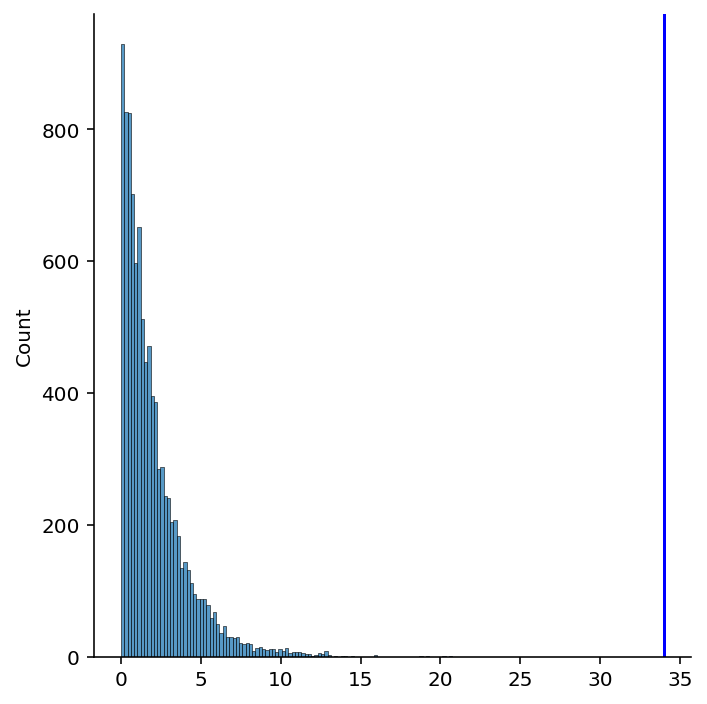

In [22]:
#plotting the results and showing our effect size in blue
sns.displot(hist_data)
plt.axvline(chi_squared_expected, color="blue")

In [24]:
#calculation of our p value
a=np.sum(hist_data>=chi_squared_expected)
pval=a/10000
pval

0.0

In [0]:
#The results of our analysis showed that the two proportions are statistically different since we reject the null hypothesis based on our p value (0<0.05). Thus, we can say that the proportion of individuals who got systemic side effects and those who did not from the 1st dose of the Pfizer vaccine is statistically different from the proportion of individuals who systemic side effects and those who did not from the 1st dose of the Astrazeneca vaccine. Conclusion: prevalence of systemic side effects is not the same between individuals who received the 1st dose of Pfizer and those who received the 1st dose of Astrazeneca.

In [15]:
#3 Find a bootstrap pivotal confidence interval for the relative risk of your outcome. What could be the practical significance of your findings?

In [25]:
#relative risk of our observed data
og_relative=(reality[0,0]/(reality[0,0]+reality[1,0]))/(reality[0,1]/(reality[0,1]+reality[1,1]))
og_relative

0.4007703595011005

In [26]:
#reminder of our observed table
reality

array([[ 38, 116],
       [244, 229]])

In [27]:
#again making a list of outcomes, creating an empty table for the relative risk calculation, and creating an empty list to store our risk calculations
#making a for loop to simulate relative risk calculations and storing it to the empty list
pfizerlist=(38*['S'])+(244*['N'])
astralist=(116*['S'])+(229*['N'])
sim_chi=np.zeros([2,2])
results=np.zeros(10000)
for i in range (10000):
    sim_pfizer_rr=np.random.choice(pfizerlist,pfizer)
    sim_chi[0,0]=np.sum(sim_pfizer_rr=='S')
    sim_chi[1,0]=np.sum(sim_pfizer_rr=='N')
    sim_astra_rr=np.random.choice(astralist,astra)
    sim_chi[0,1]=np.sum(sim_astra_rr=='S')
    sim_chi[1,1]=np.sum(sim_astra_rr=='N')
    sim=(sim_chi[0,0]/(sim_chi[0,0]+sim_chi[1,0]))/(sim_chi[0,1]/(sim_chi[0,1]+sim_chi[1,1]))
    results[i]=sim

In [28]:
#storing the results and sorting them out to compute the upper and lower bounds of the confidence interval
results.sort()
upper=(2*og_relative)-results[49]
lower=(2*og_relative)-results[9949]

In [32]:
#this is the upper and lower bounds of the relative risk confidence interval
[lower,og_relative,upper]

[0.2018327507085006, 0.4007703595011005, 0.5568598679383712]

In [0]:
#Conclusion: Having systemic side effects from a first dose is not independent of whether the individual received either the Pfizer or Astrazeneca vaccine. The relative risk is 0.401 with a 99% CI of [0.20,0.56]. Thus, it is 0.40 times more likely (or 60% less likely) to have systemic side effects from the Pfizer first dose compared to the Astrazeneca first dose.